                                                                       ### About The Competition
                                                                       
**Task:** To develop a model that can classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

**Dataset:** Training Dataset (train.csv): Contains features along with the target variable, indicating whether each mushroom is edible or poisonous.Test Dataset (test.csv): Contains the features but requires predictions for whether the mushrooms are edible or poisonous.Additional Information:

**Evaluation:** The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.

The dataset was generated from a deep learning model trained on the UCI Mushroom dataset.

In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [58]:
import numpy as np
import pandas as pd

In [59]:
train=pd.read_csv("train.csv")
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [60]:
test=pd.read_csv("test.csv")
test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [61]:
# Filling with average for numeric columns
numeric_columns = train.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    mean_value = train[column].mean()
    train[column].fillna(mean_value, inplace=True)

# Filling with mode for categorical columns
categorical_columns = train.select_dtypes(include=[object]).columns

for column in categorical_columns:
    mode_value = train[column].mode()[0]
    train[column].fillna(mode_value, inplace=True)

# Filling with constant value for specific columns (example)
# This step is optional and may vary depending on the characteristics of your dataset
specific_fill_values = {
    'cap-shape': 'Unknown',
    'cap-surface': 'Unknown',
    'has-ring': 'Unknown'  # For example some other columns
}

for column, value in specific_fill_values.items():
    if column in train.columns:
        train[column].fillna(value, inplace=True)

# Check the results
print("Eksik değerler sonrasında train veri çerçevesi:")
print(train.isna().sum())

Eksik değerler sonrasında train veri çerçevesi:
id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [62]:
# Filling with average for numeric columns
numeric_columns = test.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    mean_value = test[column].mean()
    test[column].fillna(mean_value, inplace=True)

# Filling with mode for categorical columns
categorical_columns = test.select_dtypes(include=[object]).columns

for column in categorical_columns:
    mode_value = test[column].mode()[0]
    test[column].fillna(mode_value, inplace=True)

# Filling with constant value for specific columns (example)
# This step is optional and may vary depending on the characteristics of your dataset
specific_fill_values = {
    'cap-shape': 'Unknown',
    'cap-surface': 'Unknown',
    'has-ring': 'Unknown'  # For example some other columns
}

for column, value in specific_fill_values.items():
    if column in test.columns:
        test[column].fillna(value, inplace=True)

# Check the results
print("Eksik değerler sonrasında test veri çerçevesi:")
print(test.isna().sum())

Eksik değerler sonrasında test veri çerçevesi:
id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [63]:
# The shape, that is, the size, of each dataset, specifying how many samples (observations) and how many features (attributes) the data contains
train.shape,test.shape

((3116945, 22), (2077964, 21))

In [64]:
# Adding a new column to a pandas DataFrame named 'test' and assign all values ​​to the newly added class column as 'None'
test['class']=None

In [65]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Using LabelEncoder to convert categorical data to numeric data

class_encoder=LabelEncoder()

train['class']=class_encoder.fit_transform(train['class'].to_numpy().reshape(-1,1))

label_encoders = {}

df=pd.concat([train,test],axis=0).reset_index(drop=True)

for column in df.drop('class',axis=1).select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check data frame types
print(df.dtypes)

c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


id                        int64
class                    object
cap-diameter            float64
cap-shape                 int32
cap-surface               int32
cap-color                 int32
does-bruise-or-bleed      int32
gill-attachment           int32
gill-spacing              int32
gill-color                int32
stem-height             float64
stem-width              float64
stem-root                 int32
stem-surface              int32
stem-color                int32
veil-type                 int32
veil-color                int32
has-ring                  int32
ring-type                 int32
spore-print-color         int32
habitat                   int32
season                    int32
dtype: object


In [66]:
# Separating train_df and test df data frames from df data frame and reconstructing training and test datasets from the merged dataframe

# train_df: Contains the first train.shape[0] row from the training dataset df. This data frame contains the data that will be used for the training process.
train_df=df.iloc[:train.shape[0]]

# test_df: The test dataset contains the last row test.shape[0] from df, but with the class column omitted. This dataframe contains the test data that the model will make predictions on.
test_df=df.iloc[-test.shape[0]:].drop("class",axis=1)

In [67]:
# The shape, that is, the size, of each dataset, specifying how many samples (observations) and how many features (attributes) the data contains
train_df.shape,train.shape,test_df.shape,test.shape

((3116945, 22), (3116945, 22), (2077964, 21), (2077964, 22))

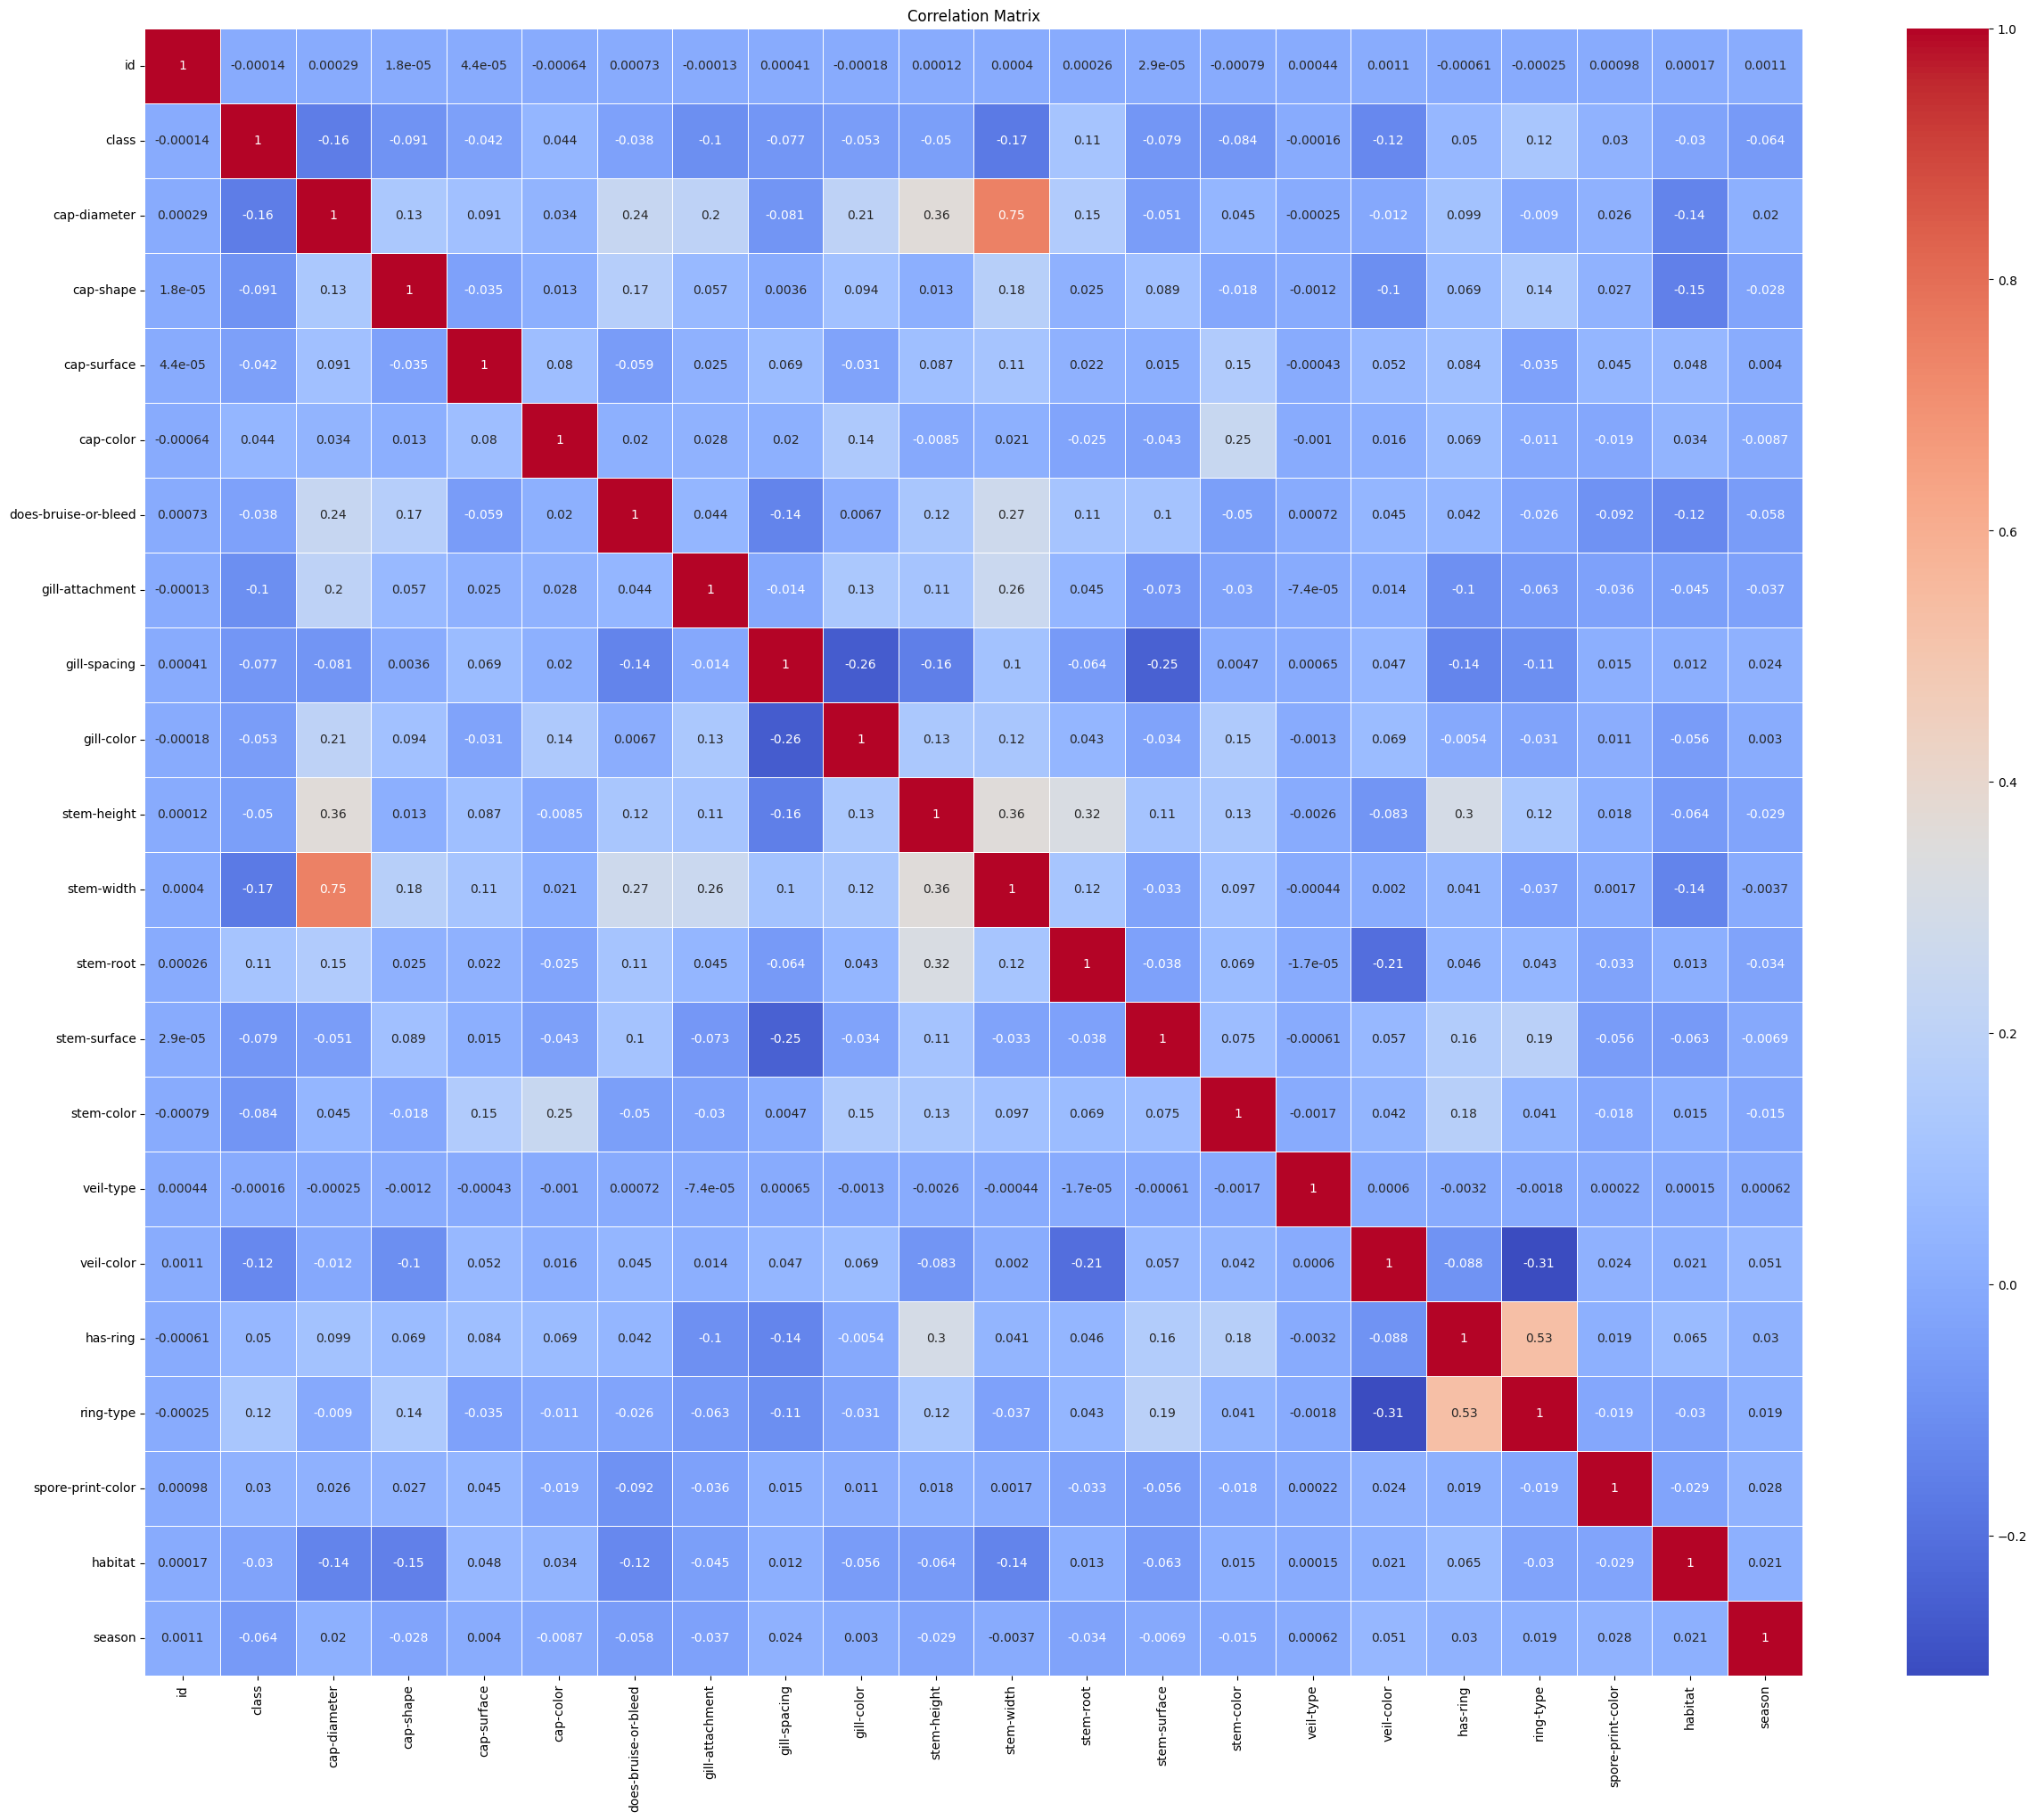

In [68]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
correlation_matrix = train_df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [69]:
# Create input properties by dropping id and class columns
X = train_df.drop(['id', 'class'], axis=1)
y = train_df['class']

# Separating X and y data sets into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Creating an XGBoost classifier using the XGBClassifier class and then fitting the training data to the model using the fit() method
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
# Making predictions based on input features (X_test) in the test set using a trained classifier model
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [72]:
# Check the data types of the variables y_test and y_pred and convert them accordingly
# Standardize data types when processing results and test labels of machine learning models

if isinstance(y_test, pd.Series):
    y_test = y_test.astype('float64')
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.astype('float64')
y_test = np.asarray(y_test, dtype=np.float64)
y_pred = np.asarray(y_pred, dtype=np.float64)

In [73]:
# Evaluating the overall accuracy of the model
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
mcc

0.9799197951219962

In [74]:
# Making predictions on the test dataset (test_df) of the machine learning model (classifier)
y_pred_test = classifier.predict(test_df.drop("id",axis=1))
y_pred_test

array([0, 1, 1, ..., 1, 0, 0])

In [75]:
# Importing the data
submission=pd.read_csv("sample_submission.csv")
submission

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [76]:
# Transform your model's predictions back to the original class labels and add those predictions to the submission data frame
submission['class']=class_encoder.inverse_transform(y_pred_test)

In [77]:
# Save the submission data frame in CSV format to a file named submission.csv
# submission.to_csv("submission.csv",index=False)